# Урок 2. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

*Примечание: для наглядности в параметрах функции построения графиков примените figsize=(25, 25) - это позволит отобразить график достаточного размера для того, чтобы его изучить.*

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [2]:
### YOUR CODE HERE ###
wines = load_wine()
print('Features:', wines.feature_names)
print('Targets names:', wines.target_names)
print('Target:', wines.target)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Targets names: ['class_0' 'class_1' 'class_2']
Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
ds_wines = pd.DataFrame(wines.data, columns=wines.feature_names)
print(ds_wines.info())
ds_wines.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
ds_wines.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


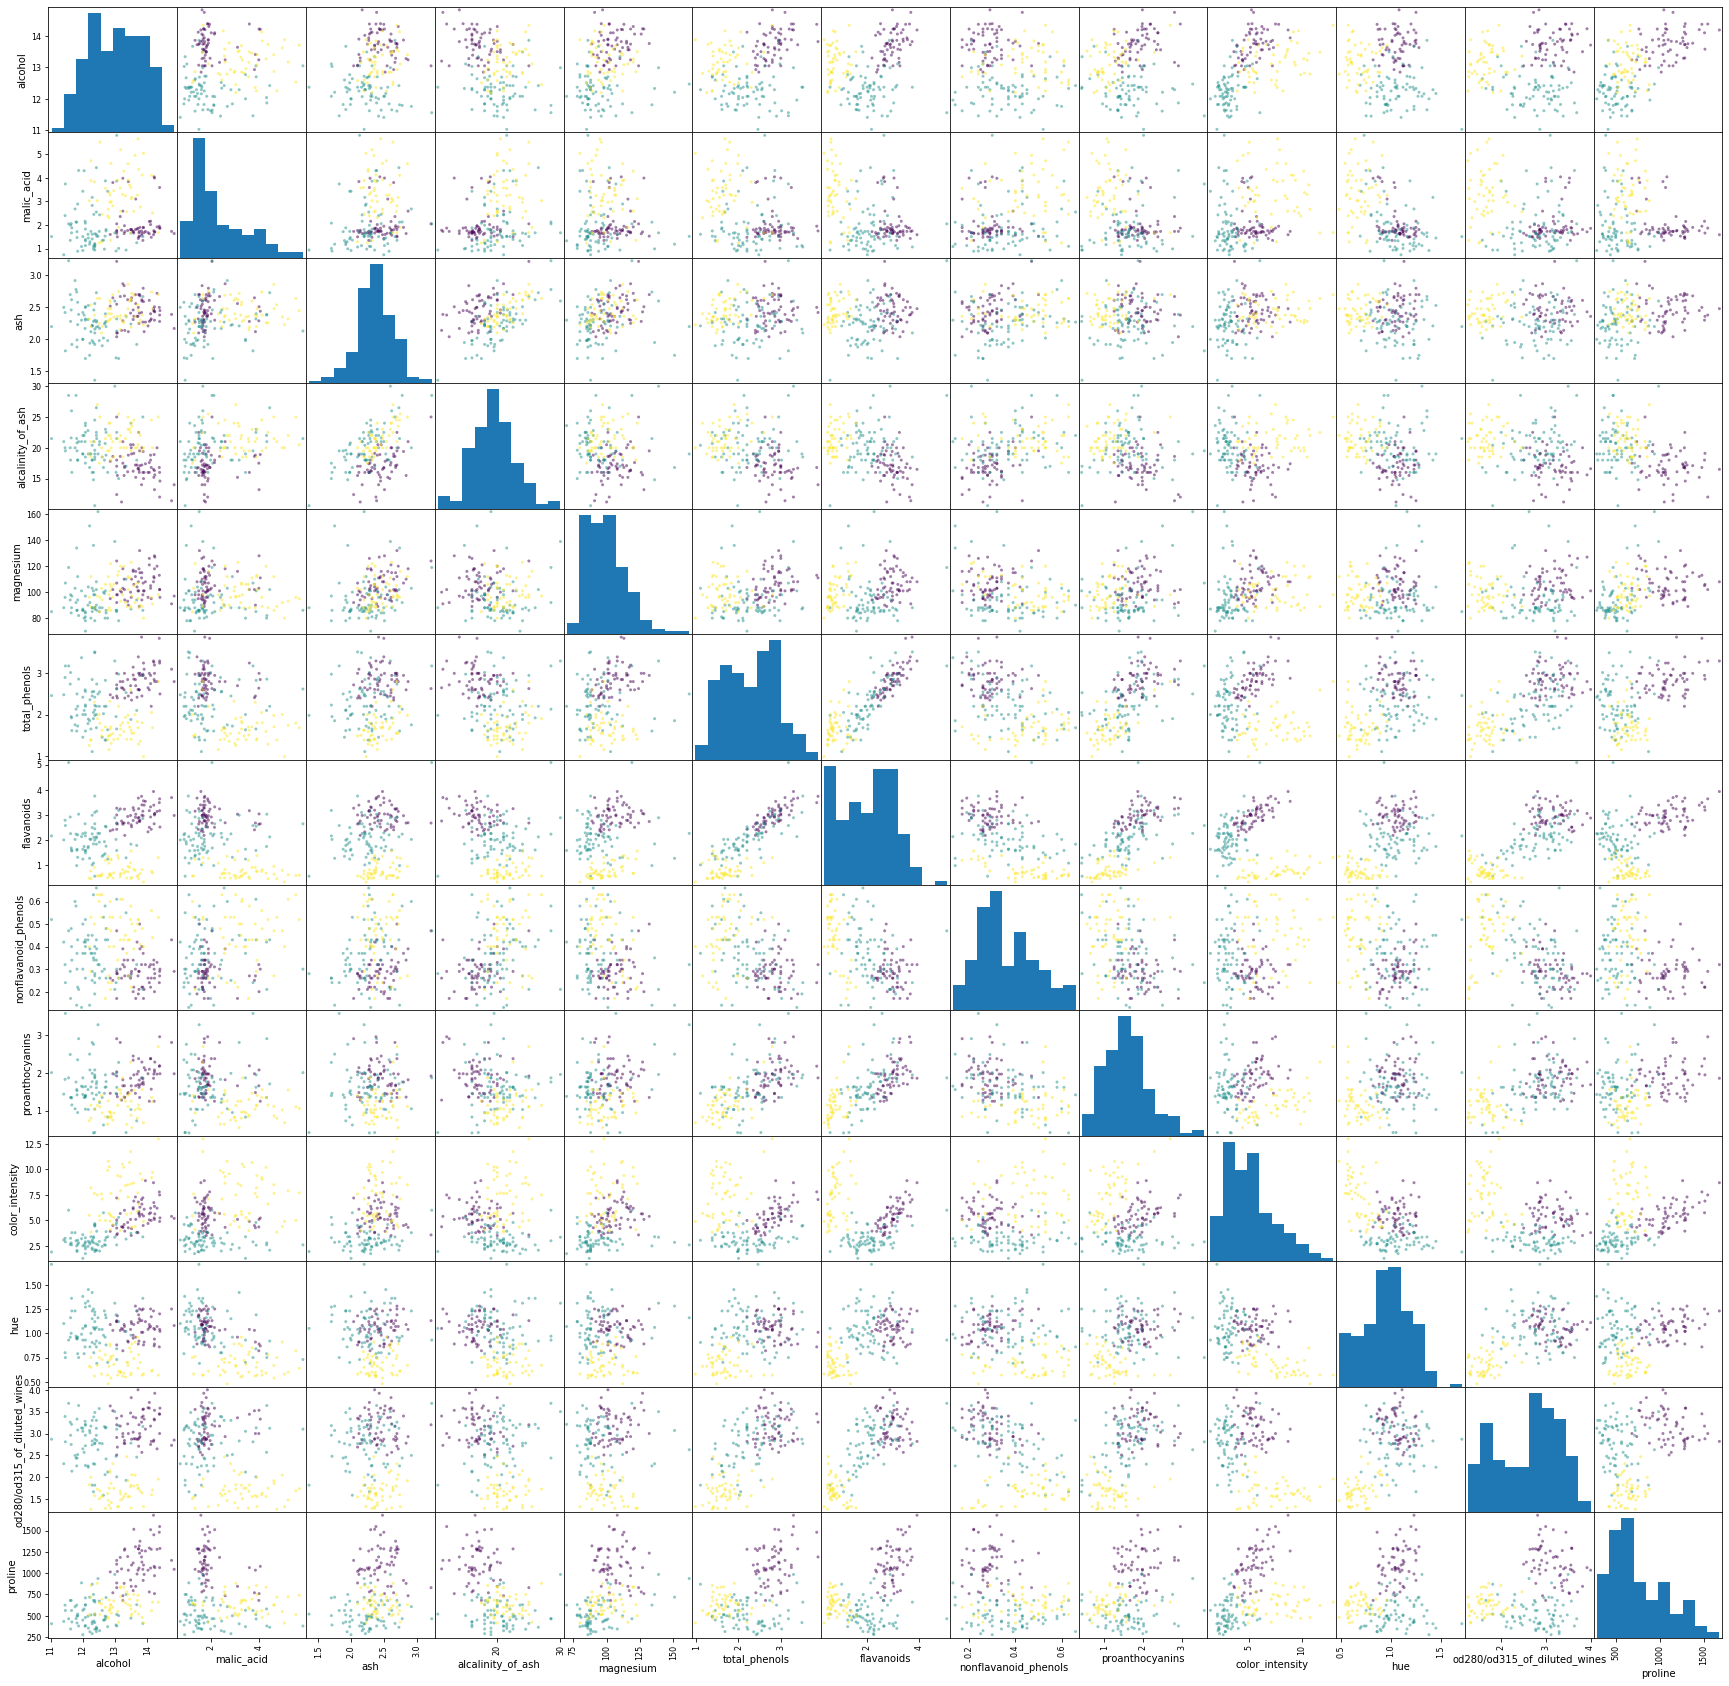

In [5]:
scat_mtrx = pd.plotting.scatter_matrix(ds_wines, c=wines.target, figsize=(30, 30))

Выберем пару Alcohol - total_phenols

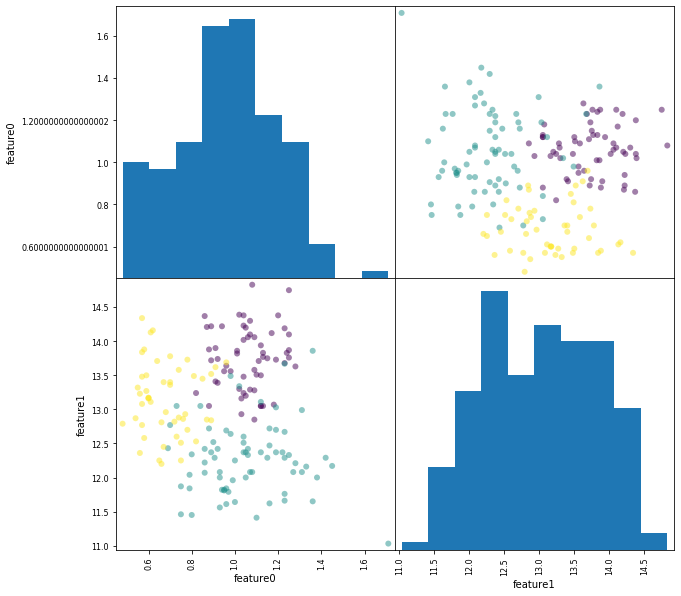

In [6]:
# Изучаем внимательнее наш выбор
ds_wines_simple = pd.DataFrame()
ds_wines_simple['feature0'] = ds_wines['hue']
ds_wines_simple['feature1'] = ds_wines['alcohol']
scat_mtrx = pd.plotting.scatter_matrix(ds_wines_simple, c=wines.target ,figsize=(10, 10),
                                      marker='o')

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [8]:
nb = GaussianNB()

### YOUR CODE HERE ###

In [9]:
x_train, x_test, y_train, y_test = train_test_split(ds_wines_simple, 
                                                    wines.target, random_state=17)
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_predictions
accuracy = nb_model.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8888888888888888


Использовал признаки 'hue' и 'alcohol, с номерами 0, 10

In [10]:
nb.predict_proba(x_test)

array([[1.38583038e-02, 9.13299936e-01, 7.28417605e-02],
       [3.68990912e-04, 9.99631007e-01, 1.75640442e-09],
       [1.03289589e-01, 8.96672450e-01, 3.79612558e-05],
       [9.68971142e-01, 3.10009373e-02, 2.79206204e-05],
       [2.64061608e-04, 2.31324688e-02, 9.76603470e-01],
       [1.63050806e-02, 2.47737760e-01, 7.35957159e-01],
       [9.95524259e-01, 3.21708967e-03, 1.25865162e-03],
       [1.48123943e-04, 9.99845042e-01, 6.83409860e-06],
       [1.33063943e-04, 5.61757386e-01, 4.38109551e-01],
       [9.92923096e-01, 4.12253188e-03, 2.95437200e-03],
       [5.70555473e-03, 1.96257003e-01, 7.98037442e-01],
       [9.92697493e-01, 7.18547057e-03, 1.17036259e-04],
       [4.37708978e-03, 9.95621421e-01, 1.48900432e-06],
       [2.87202245e-04, 9.99711420e-01, 1.37741065e-06],
       [1.19699636e-05, 7.72597390e-02, 9.22728291e-01],
       [6.23426268e-04, 2.30550828e-02, 9.76321491e-01],
       [1.41865223e-02, 6.85079530e-01, 3.00733948e-01],
       [1.87806335e-03, 9.98121

У модели GaussianNB есть метод predict_proba(test), который возвращает вероятности принадлежности каждого объекта из *test* к каждому из классов. 

### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

Взяты столбцы: od280/od315_of_diluted_wines и proline
Accuracy: 0.9777777777777777


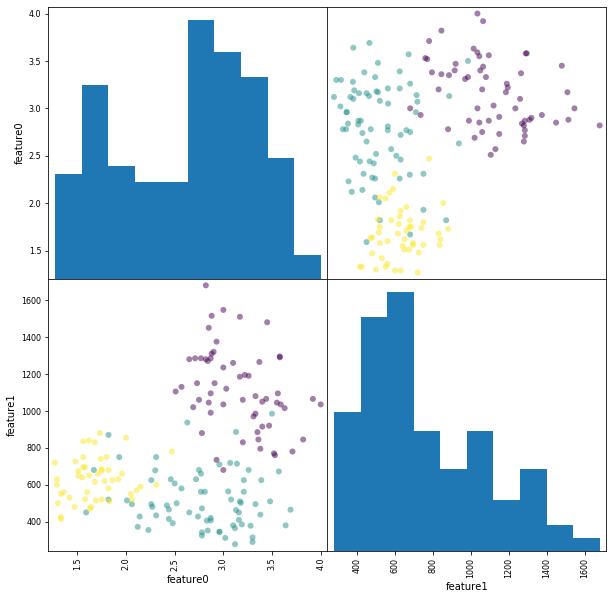

In [11]:
### YOUR CODE HERE ###
ds_wines_simple = pd.DataFrame()
ds_wines_simple['feature0'] = ds_wines.iloc[:, 11]
ds_wines_simple['feature1'] = ds_wines.iloc[:, 12]
print('Взяты столбцы:', wines.feature_names[11], 'и', wines.feature_names[12])
scat_mtrx = pd.plotting.scatter_matrix(ds_wines_simple, c=wines.target ,figsize=(10, 10),
                                      marker='o')
x_train, x_test, y_train, y_test = train_test_split(ds_wines_simple, 
                                                    wines.target, random_state=17)
nb_model2 = nb.fit(x_train, y_train)
nb_predictions = nb_model2.predict(x_test)
nb_predictions
accuracy = nb_model2.score(x_test, y_test)
print(f'Accuracy: {accuracy}')


In [13]:
proba = nb_model2.predict_proba([x_test.iloc[0]])
print('Полученные вероятности:', proba[0,0], proba[0,1], proba[0,2])

Полученные вероятности: 0.004556430297023824 0.9953314065098726 0.00011216319310257843
